# Increase the learning rate and also the size of the training set to see the bump move.

In [10]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')
sys.path.append('ffmpeg-3.4.2-32bit-static/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [ ]:
#import dill
#dill.dump_session('./data_bruckner/data/notebookData/17_BumpMove_High_learningRate')

In [ ]:
#import dill
#dill.load_session('./data_bruckner/data/notebookData/17_BumpMove_High_learningRate')

In [182]:
%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 20000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 3, hidden = 'Spin',zero_field = False)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.05,record=['W','FV','FH'],record_interval=1000,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [104]:
#from ffmpeg import ffmpeg 
#from ffmpy import FFmpeg
import inlineMovies
#reload(inlineMovies)
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

ValueError: I/O operation on closed file

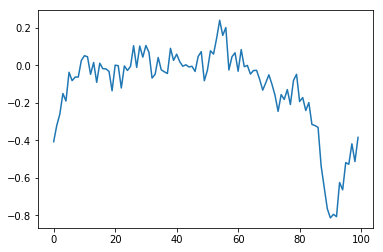

In [195]:
plt.plot(np.array(results['W'])[-15,1,:])

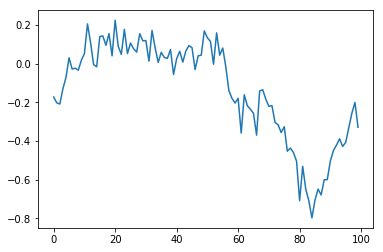

In [177]:
plt.plot(np.array(results['W'])[-150,1,:])

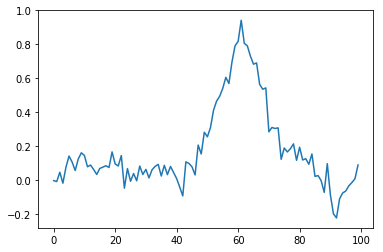

In [178]:
plt.plot(np.array(results['W'])[-100,2,:])

## Find the peak by absloute max value and check the time evolution:

In [196]:
peakCentre = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])
peakCentre = np.argmax(abs(np.array(results['W'])),axis=2)

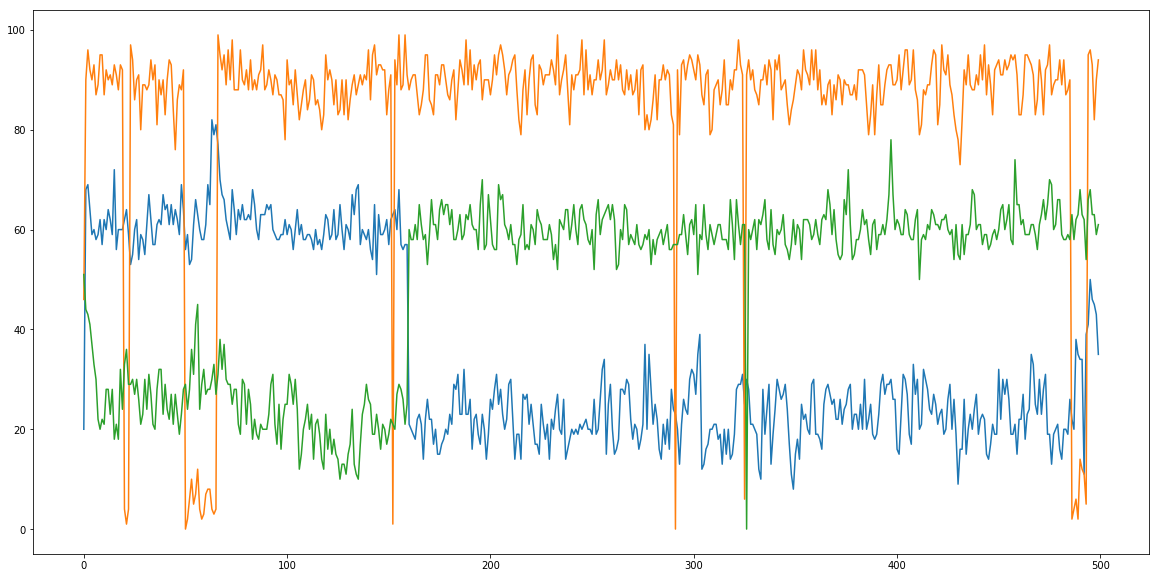

In [197]:
plt.figure(figsize=(20,10))
plt.plot(peakCentre)

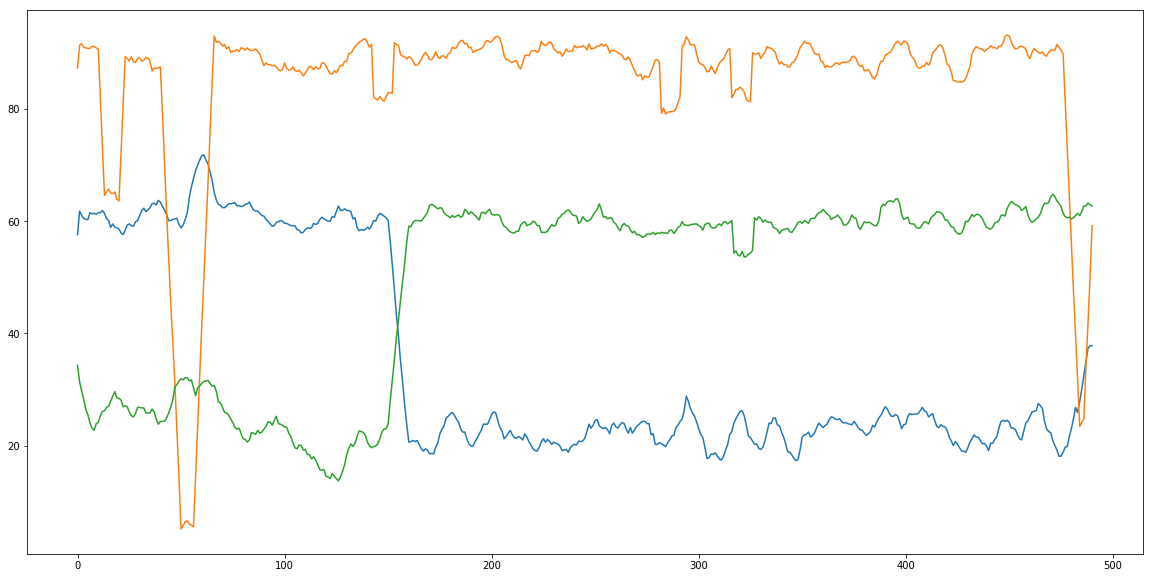

In [199]:
plt.figure(figsize=(20,10))
plt.plot(running_mean(peakCentre[:,0],10))
plt.plot(running_mean(peakCentre[:,1],10))
plt.plot(running_mean(peakCentre[:,2],10))

In [117]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [202]:
import peakDistance
reload(peakDistance)
peakDis = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])

for i in np.arange(np.shape(peakCentre)[0]):
    peakDis[i,0] = peakDistance.peakDistance(peakCentre[i,0],peakCentre[i,1],100)
    peakDis[i,1] = peakDistance.peakDistance(peakCentre[i,0],peakCentre[i,2],100)
    peakDis[i,2] = peakDistance.peakDistance(peakCentre[i,1],peakCentre[i,2],100)

N = 20
smooth0 = running_mean(peakDis[:,0],N)
smooth1 = running_mean(peakDis[:,1],N)
smooth2 = running_mean(peakDis[:,2],N)

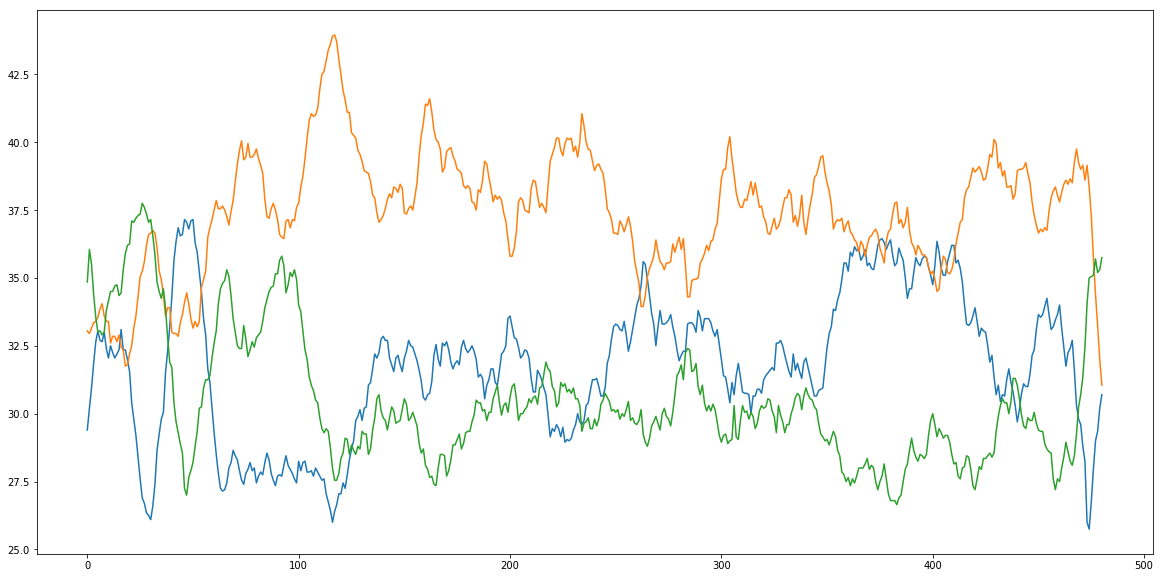

In [203]:
plt.figure(figsize=(20,10))
plt.plot(smooth0)
plt.plot(smooth1)
plt.plot(smooth2)

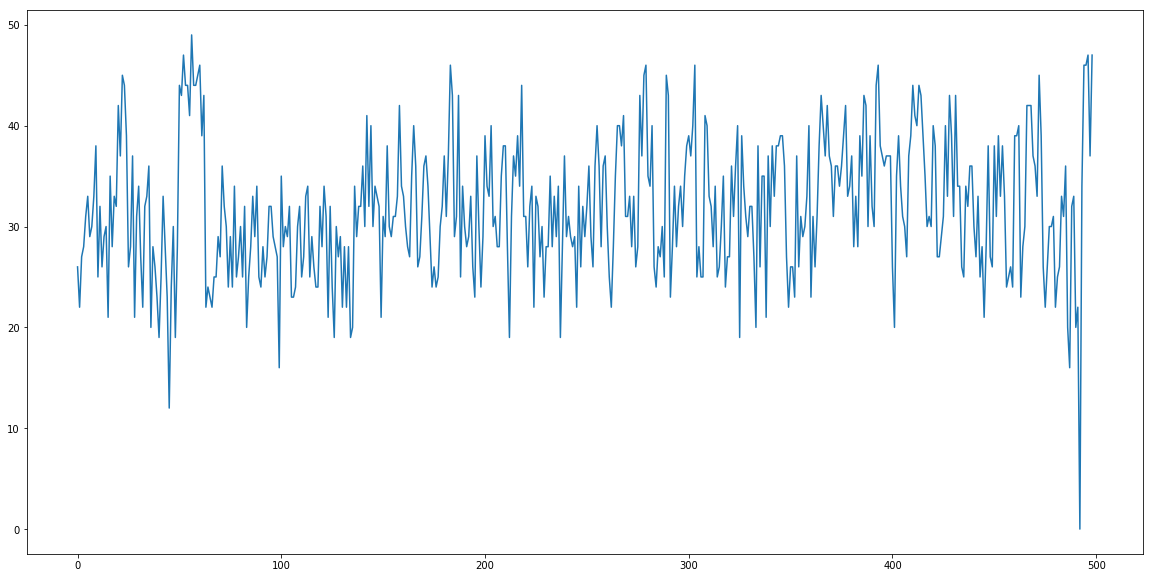

In [201]:
plt.figure(figsize=(20,10))
plt.plot(peakDis[0:-1,0])

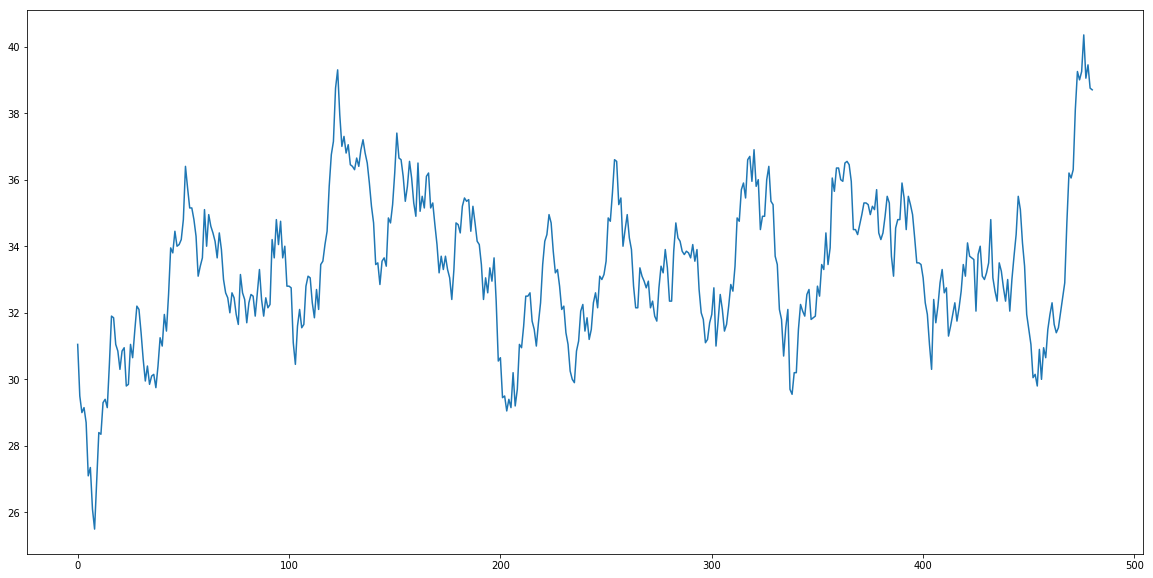

In [156]:
plt.figure(figsize=(20,10))
plt.plot(smooth0)
#plt.plot(smooth1)
#plt.plot(smooth2)

## Increase the training set size to get a smoother landscape (Also will have to increase the batch size for it to do finish faster). Also increasing step of MC to generate data for independence.

In [ ]:
%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 100000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=400) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.1,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

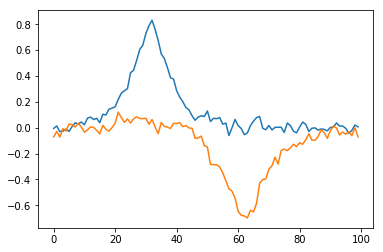

In [28]:
plt.plot(np.array(results['W'])[150,0,:])
plt.plot(np.array(results['W'])[150,1,:])

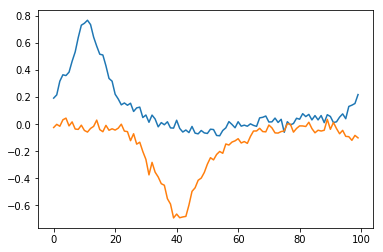

In [29]:
plt.plot(np.array(results['W'])[50,0,:])
plt.plot(np.array(results['W'])[50,1,:])

In [6]:
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

ValueError: I/O operation on closed file

In [16]:
peakCentre = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])
peakCentre = np.argmax(abs(np.array(results['W'])),axis=2)

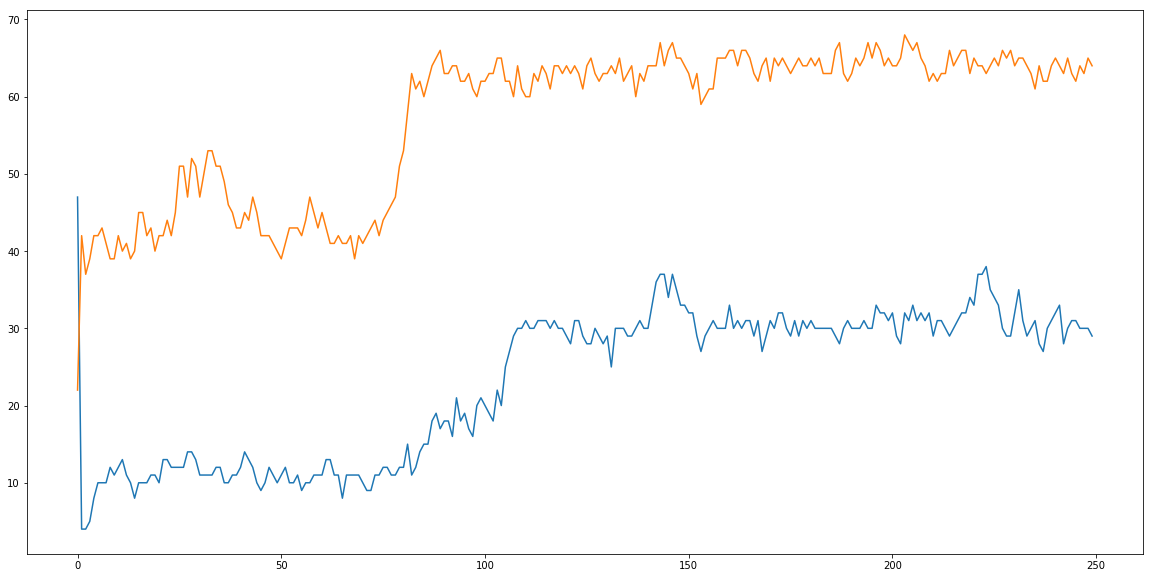

In [17]:
plt.figure(figsize=(20,10))
plt.plot(peakCentre)

## Landscape Even more smooth with the same learning rate:

In [ ]:
%%capture capt2
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs2 = 1000000

#Generate spins using Gibbs Sampling MCMC
BM2 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM2.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM2.layer.couplings[0,-1] += beta
BM2.layer.couplings[-1,0] += beta

data2 = BM2.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs2,Nstep=400) # N steps.

#Train the model
RBM2 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results2 = RBM2.fit(data2,n_iter=250,verbose=0,learning_rate = 0.1,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

In [33]:
peakCentre2 = np.zeros([np.shape(np.array(results2['W']))[0],np.shape(np.array(results2['W']))[1]])
peakCentre2 = np.argmax(abs(np.array(results2['W'])),axis=2)

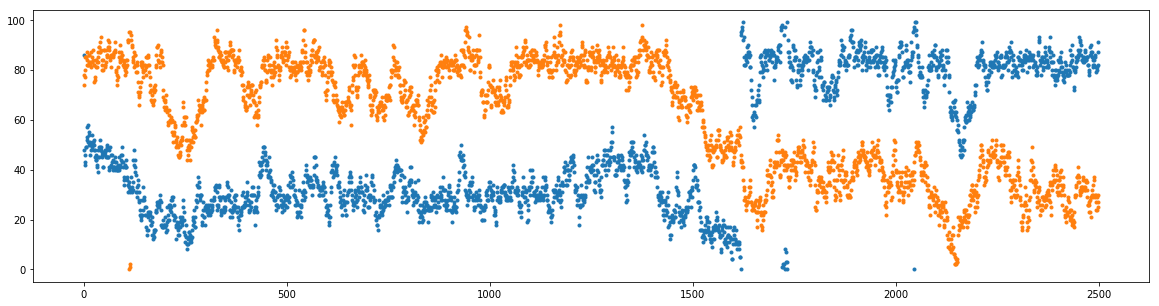

In [119]:
plt.figure(figsize=(20,5))
plt.plot(peakCentre2,'.')

### Manual correction due to Periodic Boundary Conditions - If the position moves through the boundary, add or subtract the boundary value to it

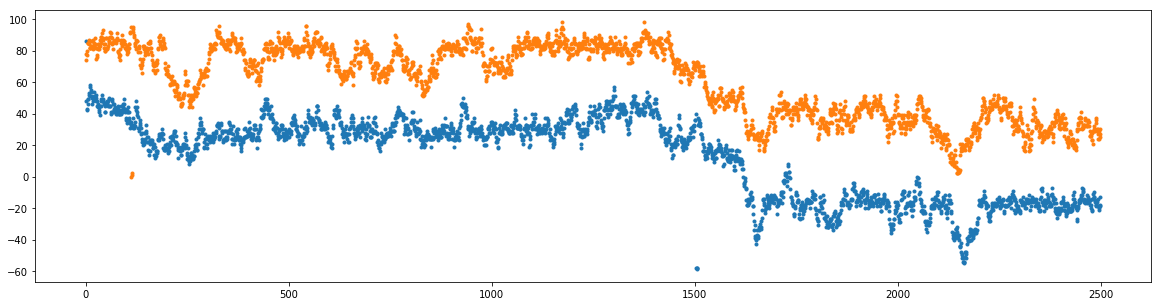

In [143]:
PBC_corc2 = np.copy(peakCentre2[1500:-1,0])
PBC_corc2[PBC_corc2>40] = PBC_corc2[PBC_corc2>40] - 100
PBC_corc2 = np.append(peakCentre2[0:1501,0],PBC_corc2)
PBC_corc2 = np.expand_dims(PBC_corc2,axis=1)
PBC_corc2 = PBC_corc2 + np.zeros([len(peakCentre2),2])
PBC_corc2[:,1] = peakCentre2[:,1]
plt.figure(figsize=(20,5))
plt.plot(PBC_corc2,'.')

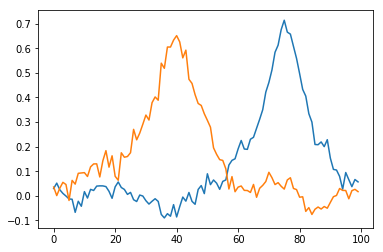

In [40]:
plt.plot(np.array(results2['W'])[2000,0,:])
plt.plot(np.array(results2['W'])[2000,1,:])

In [51]:
peakCentre2_crossCorrelation = np.correlate(peakCentre2[:,0],peakCentre2[:,1],'full')

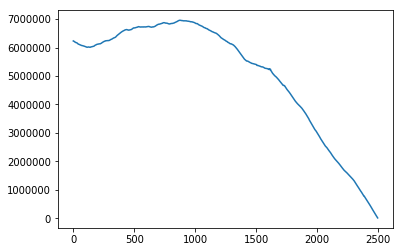

In [110]:
plt.plot(peakCentre2_crossCorrelation[-len(peakCentre2_crossCorrelation)/2:-1])

### Observation: Its like the units were not correlated before crossing over, they had independent motions -  CHECK the crosscorrelation function between them. And then they get correlated after the crossover - Also apparent from the diffusion curve later on.

## Plot two different crosscorrelation functions:
Split the signal in two parts - one before the exchnage and one after:

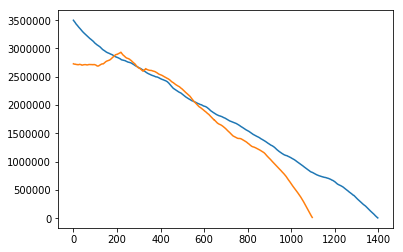

In [204]:
peakCentre2_crossCorrelation1 = np.correlate(peakCentre2[0:1400,0],peakCentre2[0:1400,1],'full')
peakCentre2_crossCorrelation2 = np.correlate(peakCentre2[1401:,0],peakCentre2[1401:,1],'full')
plt.plot(peakCentre2_crossCorrelation1[-len(peakCentre2_crossCorrelation1)/2:-1])
plt.plot(peakCentre2_crossCorrelation2[-len(peakCentre2_crossCorrelation2)/2:-1])

## Autocorrelation of both the hidden unit peaks:

In [59]:
peakCentre2_autoCorrelation = np.zeros([2*(np.shape(peakCentre2))[0]-1,np.shape(peakCentre2)[1]])
peakCentre2_autoCorrelation[:,0] = np.correlate(peakCentre2[:,0],peakCentre2[:,0],'full')
peakCentre2_autoCorrelation[:,1] = np.correlate(peakCentre2[:,1],peakCentre2[:,1],'full')

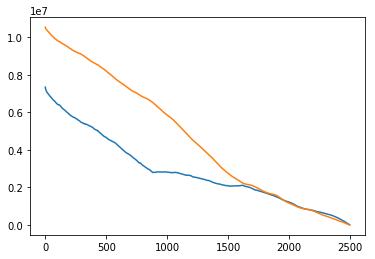

In [62]:
plt.plot(peakCentre2_autoCorrelation[-len(peakCentre2_autoCorrelation)/2:-1])

## FFT of both the signals to find modes of vibration

In [86]:
t = np.arange(len(peakCentre2))
freq = np.fft.fftfreq(t.shape[-1])
peakCentre2_fft1 = np.fft.fft(peakCentre2[:,0])
peakCentre2_fft2 = np.fft.fft(peakCentre2[:,1])

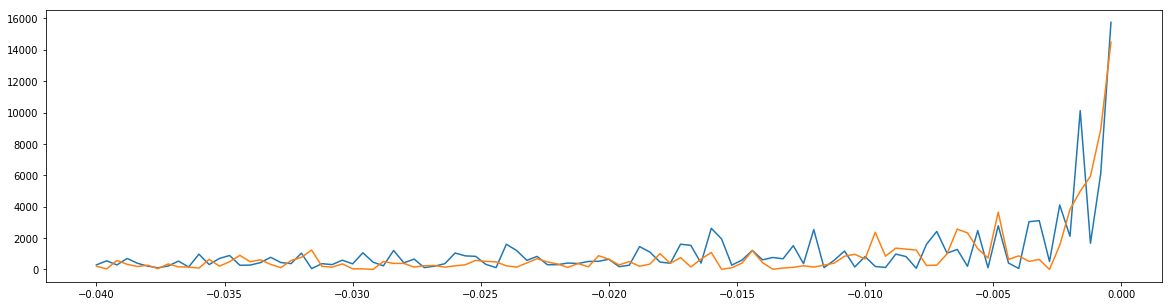

In [117]:
plt.figure(figsize=(20,5))
plt.plot(freq[2400:],abs(peakCentre2_fft1.real[2400:]))
plt.plot(freq[2400:],abs(peakCentre2_fft2.real[2400:]))

## The difference in the peak positions:

Text(0,0.5,u'Absolute value of the difference in peak Position')

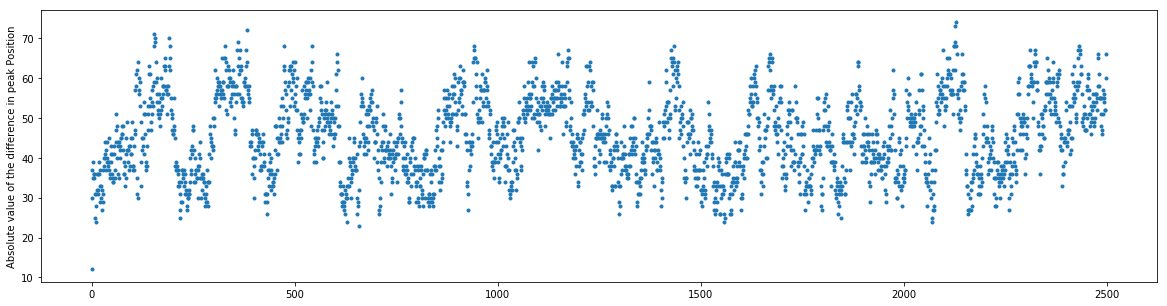

In [147]:
peakDiff2 = peakCentre2[:,0]-peakCentre2[:,1]
plt.figure(figsize=(20,5))
plt.plot(abs(peakDiff2),'.')
plt.ylabel('Absolute value of the difference in peak Position')

Text(0,0.5,u'Absolute value of the difference in peak Position')

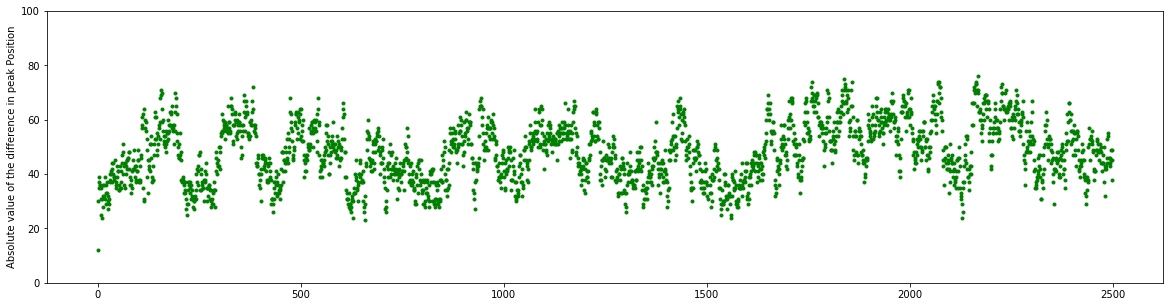

In [151]:
peakDiff2_PBC = PBC_corc2[:,0]-PBC_corc2[:,1]
plt.figure(figsize=(20,5))
plt.plot(abs(peakDiff2_PBC),'g.')
plt.ylim((0,100))
plt.ylabel('Absolute value of the difference in peak Position')

## Centre of Mass of the peaks and see if that has free diffusion:

Text(0,0.5,u'Centre of Mass of the peaks')

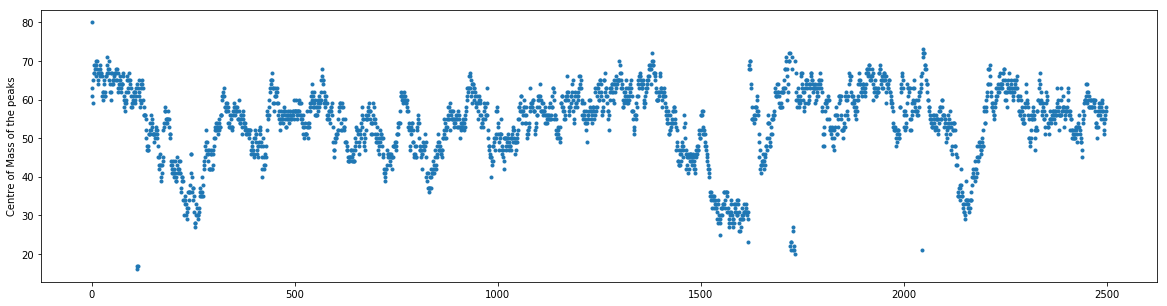

In [150]:
peakCM2 = (peakCentre2[:,0] + peakCentre2[:,1])/2
plt.figure(figsize=(20,5))
plt.plot(peakCM2,'.')
plt.ylabel('Centre of Mass of the peaks')

Text(0,0.5,u'Centre of Mass of the peaks')

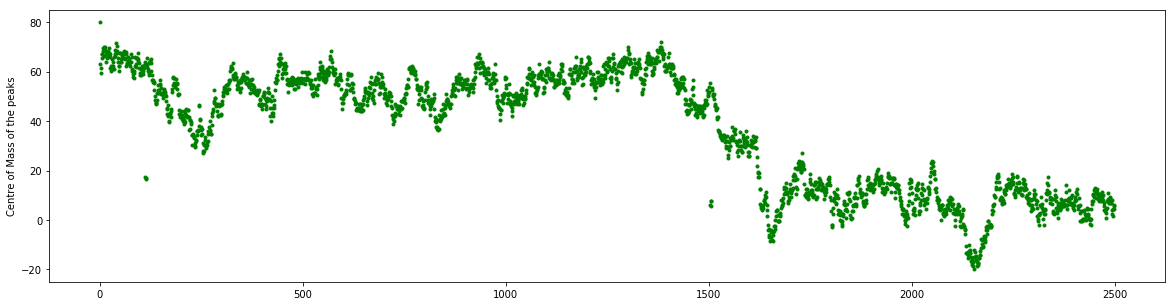

In [146]:
peakCM2_PBC = (PBC_corc2[:,0] + PBC_corc2[:,1])/2
plt.figure(figsize=(20,5))
plt.plot(peakCM2_PBC,'g.')
plt.ylabel('Centre of Mass of the peaks')

### Diffusion (MSD) analysis for this peak:

In [180]:
MSD = np.zeros([len(peakCentre2)/2,4])
for i in np.arange(len(peakCentre2)/2):
    MSD[i,0] = (np.sum((peakCentre2[:,0] - np.roll(peakCentre2[:,0],i))**2))/(len(peakCentre2[:,0]))
    MSD[i,1] = (np.sum((peakCentre2[:,1] - np.roll(peakCentre2[:,1],i))**2))/(len(peakCentre2[:,1]))
    MSD[i,2] = (np.sum((peakCM2[:] - np.roll(peakCM2[:],i))**2))/(len(peakCM2[:]))
    MSD[i,3] = (np.sum((peakDiff2[:] - np.roll(peakDiff2[:],i))**2))/(len(peakDiff2[:]))
#linear_coeff = np.polyfit(np.arange(2500/2),MSD,1)

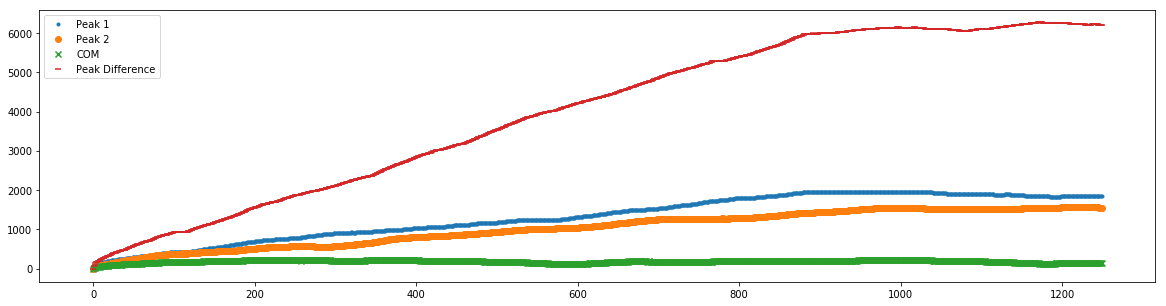

In [182]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(len(MSD)),MSD[:,0], marker='.',label = 'Peak 1')
plt.scatter(np.arange(len(MSD)),MSD[:,1], marker='o',label = 'Peak 2')
plt.scatter(np.arange(len(MSD)),MSD[:,2], marker='x',label = 'COM')
plt.scatter(np.arange(len(MSD)),MSD[:,3], marker='_',label = 'Peak Difference')
#plt.ylabel('Centre of Mass of the peaks')
plt.legend()

In [195]:
MSD_PBC = np.zeros([len(peakCentre2)/2,4])
for i in np.arange(len(peakCentre2)/2):
    MSD_PBC[i,0] = (np.sum((PBC_corc2[:,0] - np.roll(PBC_corc2[:,0],i))**2))/(len(PBC_corc2[:,0]))
    MSD_PBC[i,1] = (np.sum((PBC_corc2[:,1] - np.roll(PBC_corc2[:,1],i))**2))/(len(PBC_corc2[:,1]))
    MSD_PBC[i,2] = (np.sum((peakCM2_PBC[:] - np.roll(peakCM2_PBC[:],i))**2))/(len(peakCM2_PBC[:]))
    MSD_PBC[i,3] = (np.sum((peakDiff2_PBC[:] - np.roll(peakDiff2_PBC[:],i))**2))/(len(peakDiff2_PBC[:]))
linear_coeff = np.zeros([2,4])
linear_coeff[:,0] = np.polyfit(np.arange(len(MSD_PBC[0:900])),MSD_PBC[0:900,0],1)
linear_coeff[:,1] = np.polyfit(np.arange(len(MSD_PBC[0:900])),MSD_PBC[0:900,1],1)
linear_coeff[:,2] = np.polyfit(np.arange(len(MSD_PBC[0:900])),MSD_PBC[0:900,2],1)
linear_coeff[:,3] = np.polyfit(np.arange(len(MSD_PBC[0:900])),MSD_PBC[0:900,3],1)

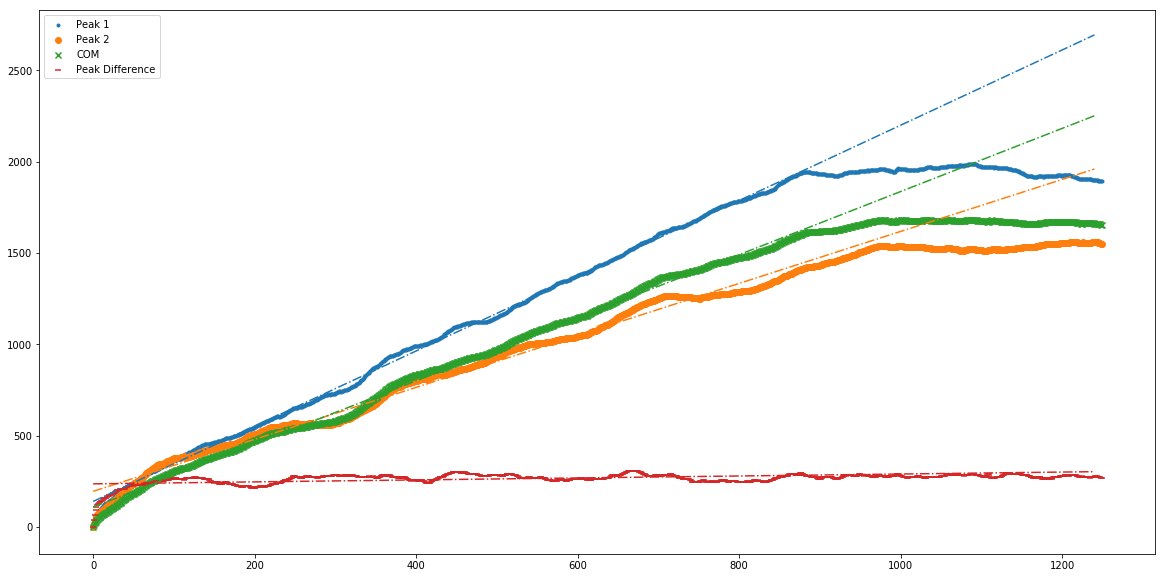

In [201]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(len(MSD)),MSD_PBC[:,0], marker='.',label = 'Peak 1')
plt.scatter(np.arange(len(MSD)),MSD_PBC[:,1], marker='o',label = 'Peak 2')
plt.scatter(np.arange(len(MSD)),MSD_PBC[:,2], marker='x',label = 'COM')
plt.scatter(np.arange(len(MSD)),MSD_PBC[:,3], marker='_',label = 'Peak Difference')
plt.plot(np.arange(len(MSD),step=10),np.arange(len(MSD),step=10)*linear_coeff[0,0]+linear_coeff[1,0],'-.')
plt.plot(np.arange(len(MSD),step=10),np.arange(len(MSD),step=10)*linear_coeff[0,1]+linear_coeff[1,1],'-.')
plt.plot(np.arange(len(MSD),step=10),np.arange(len(MSD),step=10)*linear_coeff[0,2]+linear_coeff[1,2],'-.')
plt.plot(np.arange(len(MSD),step=10),np.arange(len(MSD),step=10)*linear_coeff[0,3]+linear_coeff[1,3],'-.')
plt.legend()

## High Learning rate with regularization (l2 or l1) - a regularization term keeps the sparsity by maintaining a peak and if the peak is maintained at even high learning rates on a smooth landscape - we might get full dynamics.

In [ ]:
%%capture capt3
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs3 = 100000

#Generate spins using Gibbs Sampling MCMC
BM3 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM3.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM3.layer.couplings[0,-1] += beta
BM3.layer.couplings[-1,0] += beta

data3 = BM3.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs3,Nstep=400) # N steps.

#Train the model
RBM3 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results3 = RBM3.fit(data3,n_iter=250,verbose=0,learning_rate = 0.5,l2 = 1,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

## Make the landscape extremely smooth by increasing the number of samples and keep the same learning rate (only one hidden unit first): 

In [ ]:
%%capture capt4
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs4 = 10000000

#Generate spins using Gibbs Sampling MCMC
BM4 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM4.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM4.layer.couplings[0,-1] += beta
BM4.layer.couplings[-1,0] += beta

data4 = BM4.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs2,Nstep=400) # N steps.

#Train the model
RBM4 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results4 = RBM4.fit(data4,n_iter=250,verbose=0,learning_rate = 0.1,record=['W'],record_interval=1000,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);